## **Perhitungan Manual**

---


Import Library

In [387]:
import numpy as np

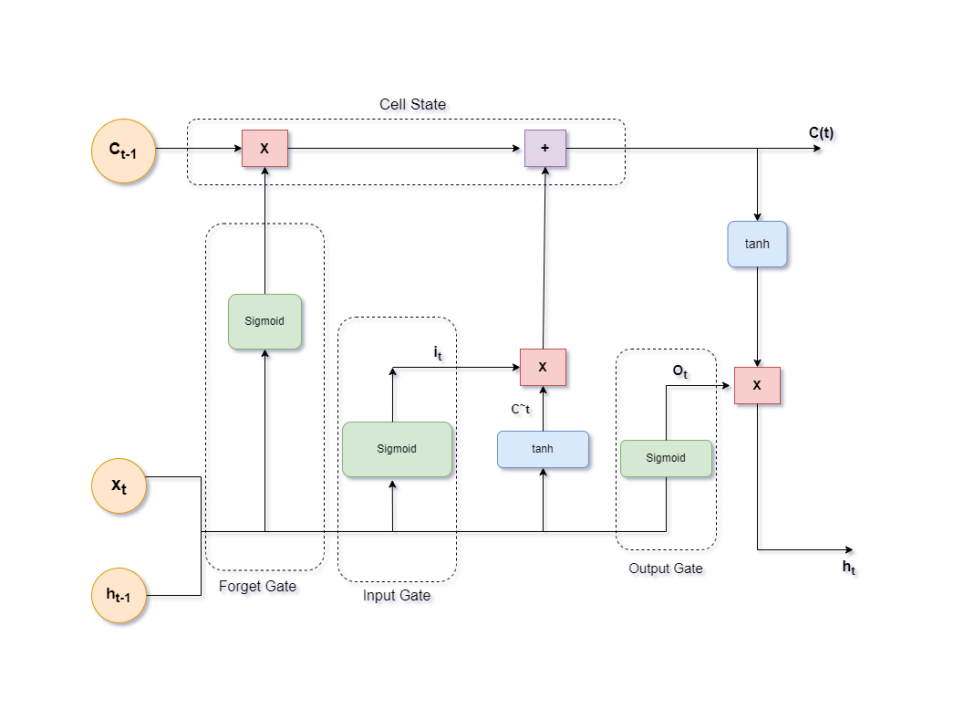

## Input Data

### 1. Input Kata

In [388]:
#Forward Gate
word = 'yang' 
x_t = np.array([-1.4, -1.7, 2.4, 6.5, -0.4, -1.5, 5.1, -1.8])

#Backward Gate
word_b = '<pad>' 
x_t_b = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [389]:
print("Input Kata pertama:", word, "(Forward Pass):", x_t)
print("Input Kata terakhir:", word_b, "(Backward Pass):", x_t_b)

Input Kata pertama: yang (Forward Pass): [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]
Input Kata terakhir: <pad> (Backward Pass): [0. 0. 0. 0. 0. 0. 0. 0.]


### 2. Hidden State Awal

$$ h_{f-1} = \text{Bobot Awal} $$
$$ b_{f-1} = \text{Bias Awal} $$

In [390]:
h_t_minus_1 = np.zeros(4)
c_t_minus_1 = np.zeros(4)

In [391]:
h_t_minus_1
c_t_minus_1

array([0., 0., 0., 0.])

## Bobot dan Bias

### Inisialisasi bobot dan bias menjadi menggunakan Glorot Uniform

**Rumus:**
$$ \text{limit} = \sqrt{\frac{6}{{\text{fan\_in} + \text{fan\_out}}}} $$

**Variabel:**

- $fan_{in}$: jumlah unit di input layer.
- $fan_{out}$: jumlah unit di output layer.

In [392]:
def glorot_uniform(shape, fan_in, fan_out):
    limit = np.sqrt(6 / (fan_in + fan_out))
    return np.random.uniform(-limit, limit, size=shape)

### 1. Forget Gate

- $W_f$: Bobot input untuk forget gate
- $U_f$: Bobot hidden state untuk forget gate
- $b_f$: Bias untuk forget gate

### Ukuran Matriks

In [393]:
fan_in_W_f = 8
fan_out_W_f = 4

fan_in_U_f = 4
fan_out_U_f = 4

fan_in_W_f_b = 8
fan_out_W_f_b = 4

fan_in_U_f_b = 4
fan_out_U_f_b = 4

### Fungsi

In [394]:
W_f = np.round(glorot_uniform((fan_in_W_f, fan_out_W_f), fan_in_W_f, fan_out_W_f), 1)
U_f = np.round(glorot_uniform((fan_in_U_f, fan_out_U_f), fan_in_U_f, fan_out_U_f), 1)
b_f = np.zeros(1)

W_f_b = np.round(glorot_uniform((fan_in_W_f_b, fan_out_W_f_b), fan_in_W_f_b, fan_out_W_f_b), 1)
U_f_b = np.round(glorot_uniform((fan_in_U_f_b, fan_out_U_f_b), fan_in_U_f_b, fan_out_U_f_b), 1)
b_f_b = np.zeros(1)

In [395]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_f)
print('Bobot Hidden : \n', U_f)
print('Bias : \n',b_f)

print('\n')

print('Bobot Backward Pass : \n')
print('Bobot Input : \n' ,W_f_b)
print('Bobot Hidden : \n', U_f_b)
print('Bias : \n',b_f_b)

Forward Pass : 

Bobot Input : 
 [[ 0.6  0.2 -0.3  0.5]
 [-0.6 -0.5  0.6  0.1]
 [-0.4 -0.2 -0.5  0.3]
 [-0.5  0.5  0.6  0.1]
 [ 0.1 -0.4  0.1 -0.6]
 [ 0.2  0.1  0.3 -0.3]
 [-0.4 -0.3 -0.5 -0.3]
 [-0.1  0.1 -0.5  0.5]]
Bobot Hidden : 
 [[ 0.4  0.   0.7  0.9]
 [-0.2  0.5 -0.3  0. ]
 [ 0.5  0.2 -0.5 -0.4]
 [-0.5 -0.5 -0.3 -0. ]]
Bias : 
 [0.]


Bobot Backward Pass : 

Bobot Input : 
 [[ 0.1 -0.1  0.3  0.2]
 [ 0.2 -0.7 -0.1  0.4]
 [-0.7 -0.6 -0.6  0.2]
 [-0.6  0.3  0.5 -0.5]
 [-0.5 -0.2  0.5  0.7]
 [ 0.   0.2 -0.2 -0.3]
 [ 0.1  0.3  0.7  0.2]
 [-0.4 -0.5  0.1  0.3]]
Bobot Hidden : 
 [[ 0.5 -0.1  0.7  0.6]
 [ 0.1 -0.6 -0.3 -0.8]
 [ 0.2 -0.3 -0.6 -0.6]
 [ 0.   0.7 -0.1 -0.4]]
Bias : 
 [0.]


### 2. Input Gate

- $W_i$: Bobot input untuk input gate
- $U_i$: Bobot hidden state untuk input gate
- $b_i$: Bias untuk input gate

In [396]:
fan_in_W_i = 8
fan_out_W_i = 4

fan_in_U_i = 4
fan_out_U_i = 4

fan_in_W_i_b = 8
fan_out_W_i_b = 4

fan_in_U_i_b = 4
fan_out_U_i_b = 4

In [397]:
W_i = np.round(glorot_uniform((fan_in_W_i, fan_out_W_i), fan_in_W_i, fan_out_W_i), 1)
U_i = np.round(glorot_uniform((fan_in_U_i, fan_out_U_i), fan_in_U_i, fan_out_U_i), 1)
b_i = np.zeros(1)

W_i_b = np.round(glorot_uniform((fan_in_W_i_b, fan_out_W_i_b), fan_in_W_i_b, fan_out_W_i_b), 1)
U_i_b = np.round(glorot_uniform((fan_in_U_i_b, fan_out_U_i_b), fan_in_U_i_b, fan_out_U_i_b), 1)
b_i_b = np.zeros(1)

In [398]:
print('Forward Pass : \n')

print('Bobot Input : \n' ,W_i)
print('Bobot Hidden : \n', U_i)
print('Bias : \n',b_i)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_i_b)
print('Bobot Hidden : \n', U_i_b)
print('Bias : \n',b_i_b)


Forward Pass : 

Bobot Input : 
 [[ 0.2 -0.5 -0.2 -0.1]
 [ 0.3  0.5 -0.4  0.3]
 [ 0.1  0.7  0.4  0.6]
 [-0.1 -0.4  0.6 -0.3]
 [ 0.1  0.4  0.4 -0.1]
 [-0.7  0.2 -0.2 -0.2]
 [-0.5 -0.6 -0.6 -0.2]
 [-0.1  0.6 -0.1 -0.3]]
Bobot Hidden : 
 [[-0.4  0.1 -0.  -0.1]
 [-0.1 -0.5  0.3 -0.1]
 [-0.9  0.6 -0.8  0.6]
 [ 0.8  0.2  0.9 -0.7]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.1 -0.7  0.5  0.3]
 [-0.7 -0.4 -0.  -0.6]
 [-0.6 -0.4  0.6 -0.6]
 [ 0.5 -0.3 -0.5 -0.4]
 [-0.5 -0.7  0.2  0. ]
 [-0.3 -0.6 -0.1 -0.6]
 [ 0.2  0.2  0.4  0.5]
 [ 0.1 -0.6 -0.5  0.1]]
Bobot Hidden : 
 [[-0.6  0.6  0.6 -0.2]
 [-0.5  0.8  0.2  0.1]
 [-0.5 -0.7 -0.2 -0.7]
 [-0.2  0.2  0.4 -0.8]]
Bias : 
 [0.]


### 3. Cell State

- $W_c$: Bobot input untuk cell state candidate
- $U_c$: Bobot hidden state untuk cell state candidate
- $b_c$: Bias untuk cell state candidate

In [399]:
fan_in_W_c = 8
fan_out_W_c = 4

fan_in_U_c = 4
fan_out_U_c = 4

fan_in_W_c_b = 8
fan_out_W_c_b = 4

fan_in_U_c_b = 4
fan_out_U_c_b = 4

In [400]:
W_c = np.round(glorot_uniform((fan_in_W_c, fan_out_W_c), fan_in_W_c, fan_out_W_c), 1)
U_c = np.round(glorot_uniform((fan_in_U_c, fan_out_U_c), fan_in_U_c, fan_out_U_c), 1)
b_c = np.zeros(1)

W_c_b = np.round(glorot_uniform((fan_in_W_c_b, fan_out_W_c_b), fan_in_W_c_b, fan_out_W_c_b), 1)
U_c_b = np.round(glorot_uniform((fan_in_U_c_b, fan_out_U_c_b), fan_in_U_c_b, fan_out_U_c_b), 1)
b_c_b = np.zeros(1)

In [401]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_c)
print('Bobot Hidden : \n', U_c)
print('Bias : \n',b_c)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_c_b)
print('Bobot Hidden : \n', U_c_b)
print('Bias : \n',b_c_b)

Forward Pass : 

Bobot Input : 
 [[ 0.5  0.5 -0.5 -0.4]
 [ 0.2  0.5 -0.   0.6]
 [-0.5  0.1  0.3  0.4]
 [-0.4 -0.1  0.6  0.2]
 [-0.4  0.3  0.3  0.1]
 [ 0.3 -0.3 -0.4  0.2]
 [ 0.5  0.   0.3 -0. ]
 [ 0.4 -0.1 -0.1  0.6]]
Bobot Hidden : 
 [[-0.  -0.1 -0.   0.3]
 [ 0.3  0.2  0.2 -0.5]
 [ 0.   0.7 -0.1  0.5]
 [-0.1 -0.4  0.7 -0.5]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[ 0.1 -0.7  0.6  0.1]
 [ 0.7 -0.1  0.2  0.6]
 [ 0.1 -0.6  0.5  0.3]
 [ 0.7  0.  -0.2 -0.1]
 [-0.3  0.2  0.5  0. ]
 [-0.7 -0.3 -0.6 -0.1]
 [-0.4 -0.4 -0.1  0.6]
 [-0.  -0.6  0.4  0.6]]
Bobot Hidden : 
 [[-0.2  0.   0.5  0.3]
 [-0.8 -0.5  0.7  0.1]
 [ 0.5 -0.1 -0.4  0.7]
 [ 0.7 -0.1  0.8  0.5]]
Bias : 
 [0.]


### 4. Output Gate

- $W_o$: Bobot input untuk output gate
- $U_o$: Bobot hidden state untuk output gate
- $b_o$: Bias untuk output gate

In [402]:
fan_in_W_o = 8
fan_out_W_o = 4

fan_in_U_o = 4
fan_out_U_o = 4

fan_in_W_o_b = 8
fan_out_W_o_b = 4

fan_in_U_o_b = 4
fan_out_U_o_b = 4

In [403]:
W_o = np.round(glorot_uniform((fan_in_W_o, fan_out_W_o), fan_in_W_o, fan_out_W_o), 1)
U_o = np.round(glorot_uniform((fan_in_U_o, fan_out_U_o), fan_in_U_o, fan_out_U_o), 1)
b_o = np.zeros(1)

W_o_b = np.round(glorot_uniform((fan_in_W_o_b, fan_out_W_o_b), fan_in_W_o_b, fan_out_W_o_b), 1)
U_o_b = np.round(glorot_uniform((fan_in_U_o_b, fan_out_U_o_b), fan_in_U_o_b, fan_out_U_o_b), 1)
b_o_b = np.zeros(1)

In [404]:
print('Forward Pass : \n')
print('Bobot Input : \n' ,W_o)
print('Bobot Hidden : \n', U_o)
print('Bias : \n',b_o)

print('\n')
print('Backward Pass : \n')
print('Bobot Input : \n' ,W_o_b)
print('Bobot Hidden : \n', U_o_b)
print('Bias : \n',b_o_b)

Forward Pass : 

Bobot Input : 
 [[ 0.2  0.3 -0.5 -0.1]
 [ 0.5  0.5 -0.5  0. ]
 [ 0.6 -0.3 -0.  -0.1]
 [-0.6  0.2  0.1  0.5]
 [-0.3 -0.6 -0.5  0.1]
 [-0.5 -0.3 -0.1 -0.5]
 [ 0.2 -0.1 -0.2  0.6]
 [ 0.2 -0.6  0.1 -0.1]]
Bobot Hidden : 
 [[ 0.8 -0.2  0.3  0.1]
 [-0.2  0.6  0.6 -0.6]
 [ 0.7  0.7 -0.5  0.2]
 [-0.5  0.1 -0.5  0.6]]
Bias : 
 [0.]


Backward Pass : 

Bobot Input : 
 [[-0.3 -0.7  0.7 -0.6]
 [ 0.3 -0.1  0.7 -0.3]
 [ 0.6 -0.   0.6  0.4]
 [-0.3 -0.1  0.6 -0.5]
 [ 0.2 -0.4  0.6  0.4]
 [-0.2  0.6  0.3 -0.2]
 [ 0.6 -0.1  0.1 -0.7]
 [ 0.  -0.3 -0.6  0.1]]
Bobot Hidden : 
 [[ 0.6  0.8 -0.7 -0.8]
 [ 0.1 -0.2  0.4 -0.8]
 [ 0.2 -0.3  0.3 -0.5]
 [ 0.1  0.4 -0.4  0. ]]
Bias : 
 [0.]


### 5. Klasifikasi
- $W_{\text{clf}}$: Bobot untuk klasifikasi
- $b_{\text{clf}}$: Bias untuk klasifikasi

In [405]:
W_clf = np.round(np.random.rand(8, 6), 1)
b_clf = np.round(np.random.rand(6), 1)

In [406]:
print('Bobot Input : \n' ,W_clf)
print('Bias : \n',b_clf)

Bobot Input : 
 [[0.8 0.6 0.5 0.7 0.2 0.5]
 [0.2 0.8 0.3 0.2 0.5 1. ]
 [0.9 0.1 0.7 0.5 0.4 0.9]
 [0.2 0.8 0.5 0.9 0.6 0.7]
 [0.3 0.9 0.1 0.5 0.7 0.8]
 [0.1 0.6 0.4 0.2 0.8 0.6]
 [0.8 0.2 0.3 0.3 0.6 0.2]
 [0.2 0.8 0.2 0.8 0.  0.8]]
Bias : 
 [0.8 0.2 0.1 0.8 0.4 0.4]


## Fungsi Aktivasi

### 1. Sigmoid

**Rumus:**
$$ \text{sigmoid}(x) = \frac{1}{1 + e^{-x}} $$

**Variabel:**

- **$x$**: Nilai input yang akan diubah oleh fungsi sigmoid. Ini bisa berupa output dari layer sebelumnya dalam jaringan neural.
- **$e$**: Bilangan Euler (sekitar 2.71828), yang merupakan basis dari logaritma alami.
- **$\text{sigmoid}(x)$**: Output dari fungsi sigmoid, yang akan berada dalam rentang (0, 1).





In [407]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


### 2. Softmax

**Rumus:**
$$ \text{softmax}(x) = \frac{e^{x - \max(x)}}{\sum e^{x - \max(x)}} $$

**Variabel:**
- **$x$**: Vektor input yang berisi nilai mentah (logit) untuk setiap kelas.
- **$x_i$**: Nilai input untuk kelas ke-$i$.
- **$\max(x)$**: Nilai maksimum dalam vektor $x$. Ini sering digunakan untuk stabilitas numerik agar nilai eksponensial tidak menjadi terlalu besar.
- **$e$**: Bilangan Euler (sekitar 2.71828).
- **$\text{softmax}(x_i)$**: Output dari fungsi softmax untuk kelas ke-$i$, yang merupakan probabilitas prediksi untuk kelas tersebut.
- **$\sum_{j}$**: Penjumlahan nilai eksponensial dari semua kelas $j$.




In [408]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)


## Tahapan

### 1. Forget Gate

**Rumus:**
$$ f_t = \sigma(W_f \cdot x_t + U_f \cdot h_{t-1} + b_f) $$

**Variabel:**

- $f_t$: Forget gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_f$: Bobot input untuk forget gate
- $x_t$: Input pada waktu $t$
- $U_f$: Bobot hidden state untuk forget gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_f$: Bias untuk forget gate



In [409]:
#Forward Pass
def calculate_forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f):
    return sigmoid(np.dot(x_t, W_f) + np.dot(h_t_minus_1, U_f) + b_f)

#Backward Pass
def calculate_forget_gate_b(x_t_b, h_t_minus_1, W_f_b, U_f_b, b_f_b):
    return sigmoid(np.dot(x_t_b, W_f_b) + np.dot(h_t_minus_1, U_f_b) + b_f_b)


In [410]:
f_t = calculate_forget_gate(x_t, h_t_minus_1, W_f, U_f, b_f)
print(f"f_t {W_f} x {x_t} \n + {h_t_minus_1} x {U_f} \n + {b_f}")
print(f" Hasil Forget Gate (Forward Pass): {f_t}")

f_t [[ 0.6  0.2 -0.3  0.5]
 [-0.6 -0.5  0.6  0.1]
 [-0.4 -0.2 -0.5  0.3]
 [-0.5  0.5  0.6  0.1]
 [ 0.1 -0.4  0.1 -0.6]
 [ 0.2  0.1  0.3 -0.3]
 [-0.4 -0.3 -0.5 -0.3]
 [-0.1  0.1 -0.5  0.5]] x [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8] 
 + [0. 0. 0. 0.] x [[ 0.4  0.   0.7  0.9]
 [-0.2  0.5 -0.3  0. ]
 [ 0.5  0.2 -0.5 -0.4]
 [-0.5 -0.5 -0.3 -0. ]] 
 + [0.]
 Hasil Forget Gate (Forward Pass): [0.00196558 0.83753494 0.49000133 0.22443599]


In [411]:
f_t_b = calculate_forget_gate_b(x_t_b, h_t_minus_1, W_f_b, U_f_b, b_f_b)
print(f"f_t {W_f_b} x {x_t_b} \n + {h_t_minus_1} x {U_f_b} \n + {b_f_b}")
print(f" Hasil Forget Gate (Backward Pass): {f_t_b}")

f_t [[ 0.1 -0.1  0.3  0.2]
 [ 0.2 -0.7 -0.1  0.4]
 [-0.7 -0.6 -0.6  0.2]
 [-0.6  0.3  0.5 -0.5]
 [-0.5 -0.2  0.5  0.7]
 [ 0.   0.2 -0.2 -0.3]
 [ 0.1  0.3  0.7  0.2]
 [-0.4 -0.5  0.1  0.3]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] x [[ 0.5 -0.1  0.7  0.6]
 [ 0.1 -0.6 -0.3 -0.8]
 [ 0.2 -0.3 -0.6 -0.6]
 [ 0.   0.7 -0.1 -0.4]] 
 + [0.]
 Hasil Forget Gate (Backward Pass): [0.5 0.5 0.5 0.5]


### 2. Input Gate

**Rumus:**
$$ i_t = \sigma(W_i \cdot x_t + U_i \cdot h_{t-1} + b_i) $$

**Variabel:**
- $i_t$: Input gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_i$: Bobot input untuk input gate
- $x_t$: Input pada waktu $t$
- $U_i$: Bobot hidden state untuk input gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_i$: Bias untuk input gate

In [412]:
#Forward Pass
def calculate_input_gate(x_t, h_t_minus_1, W_i, U_i, b_i):
    return sigmoid(np.dot(x_t, W_i) + np.dot(h_t_minus_1, U_i) + b_i)

#Backward Pass
def calculate_input_gate_b(x_t_b, h_t_minus_1, W_i_b, U_i_b, b_i_b):
    return sigmoid(np.dot(x_t_b, W_i_b) + np.dot(h_t_minus_1, U_i_b) + b_i_b)

In [413]:
i_t = calculate_input_gate(x_t, h_t_minus_1, W_i, U_i, b_i)
print(f"i_t {W_i} x {x_t} \n + {h_t_minus_1} x {U_i} \n + {b_i}")
print(f"Hasil Input Gate (Forward Pass): {i_t}")

i_t [[ 0.2 -0.5 -0.2 -0.1]
 [ 0.3  0.5 -0.4  0.3]
 [ 0.1  0.7  0.4  0.6]
 [-0.1 -0.4  0.6 -0.3]
 [ 0.1  0.4  0.4 -0.1]
 [-0.7  0.2 -0.2 -0.2]
 [-0.5 -0.6 -0.6 -0.2]
 [-0.1  0.6 -0.1 -0.3]] x [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8] 
 + [0. 0. 0. 0.] x [[-0.4  0.1 -0.  -0.1]
 [-0.1 -0.5  0.3 -0.1]
 [-0.9  0.6 -0.8  0.6]
 [ 0.8  0.2  0.9 -0.7]] 
 + [0.]
Hasil Input Gate (Forward Pass): [0.07175754 0.00343602 0.95606018 0.2650274 ]


In [414]:
i_t_b = calculate_input_gate_b(x_t_b, h_t_minus_1, W_i_b, U_i_b, b_i_b)
print(f"i_t {W_i_b} x {x_t_b} \n + {h_t_minus_1} x {U_i_b} \n + {b_i_b}")
print(f"Hasil Input Gate (Backward Pass): {i_t_b}")

i_t [[-0.1 -0.7  0.5  0.3]
 [-0.7 -0.4 -0.  -0.6]
 [-0.6 -0.4  0.6 -0.6]
 [ 0.5 -0.3 -0.5 -0.4]
 [-0.5 -0.7  0.2  0. ]
 [-0.3 -0.6 -0.1 -0.6]
 [ 0.2  0.2  0.4  0.5]
 [ 0.1 -0.6 -0.5  0.1]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] x [[-0.6  0.6  0.6 -0.2]
 [-0.5  0.8  0.2  0.1]
 [-0.5 -0.7 -0.2 -0.7]
 [-0.2  0.2  0.4 -0.8]] 
 + [0.]
Hasil Input Gate (Backward Pass): [0.5 0.5 0.5 0.5]


### 3. Candidate Cell

**Rumus:**
$$ \tilde{c}_t = \tanh(W_c \cdot x_t + U_c \cdot h_{t-1} + b_c) $$

**Variabel:**
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$
- $\tanh$: Fungsi tanh
- $W_c$: Bobot input untuk cell state candidate
- $x_t$: Input pada waktu $t$
- $U_c$: Bobot hidden state untuk cell state candidate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_c$: Bias untuk cell state candidate



In [415]:
#Forward Pass
def calculate_candidate(x_t, h_t_minus_1, W_c, U_c, b_c):
    return np.tanh(np.dot(x_t, W_c) + np.dot(h_t_minus_1, U_c) + b_c)

#Backward Pass
def calculate_candidate_b(x_t_b, h_t_minus_1, W_c_b, U_c_b, b_c_b):
    return np.tanh(np.dot(x_t_b, W_c_b) + np.dot(h_t_minus_1, U_c_b) + b_c_b)

In [416]:
c_tilde_t = calculate_candidate(x_t, h_t_minus_1, W_c, U_c, b_c)
print(f"c_tilde_t {W_c} x {x_t} \n + {h_t_minus_1} x {U_c} \n + {b_c}")
print(f"Cell State Candidate (Forward Pass): {c_tilde_t}")


c_tilde_t [[ 0.5  0.5 -0.5 -0.4]
 [ 0.2  0.5 -0.   0.6]
 [-0.5  0.1  0.3  0.4]
 [-0.4 -0.1  0.6  0.2]
 [-0.4  0.3  0.3  0.1]
 [ 0.3 -0.3 -0.4  0.2]
 [ 0.5  0.   0.3 -0. ]
 [ 0.4 -0.1 -0.1  0.6]] x [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8] 
 + [0. 0. 0. 0.] x [[-0.  -0.1 -0.   0.3]
 [ 0.3  0.2  0.2 -0.5]
 [ 0.   0.7 -0.1  0.5]
 [-0.1 -0.4  0.7 -0.5]] 
 + [0.]
Cell State Candidate (Forward Pass): [-0.99728296 -0.89569287  0.9999994   0.36270747]


In [417]:
c_tilde_t_b = calculate_candidate_b(x_t_b, h_t_minus_1, W_c_b, U_c_b, b_c_b)
print(f"c_tilde_t {W_c_b} x {x_t_b} \n + {h_t_minus_1} x {U_c_b} \n + {b_c_b}")
print(f"Cell State Candidate (Backward Pass): {c_tilde_t_b}")

c_tilde_t [[ 0.1 -0.7  0.6  0.1]
 [ 0.7 -0.1  0.2  0.6]
 [ 0.1 -0.6  0.5  0.3]
 [ 0.7  0.  -0.2 -0.1]
 [-0.3  0.2  0.5  0. ]
 [-0.7 -0.3 -0.6 -0.1]
 [-0.4 -0.4 -0.1  0.6]
 [-0.  -0.6  0.4  0.6]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] x [[-0.2  0.   0.5  0.3]
 [-0.8 -0.5  0.7  0.1]
 [ 0.5 -0.1 -0.4  0.7]
 [ 0.7 -0.1  0.8  0.5]] 
 + [0.]
Cell State Candidate (Backward Pass): [0. 0. 0. 0.]


### 4. Cell State Update

**Rumus:**
$$ c_t = f_t \cdot c_{t-1} + i_t \cdot \tilde{c}_t $$

**Variabel:**
- $c_t$: Cell state pada waktu $t$
- $f_t$: Forget gate activation pada waktu $t$
- $c_{t-1}$: Cell state pada waktu $t-1$
- $i_t$: Input gate activation pada waktu $t$
- $\tilde{c}_t$: Kandidat cell state pada waktu $t$


In [418]:
#Forward Pass
def calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t):
    return f_t * c_t_minus_1 + i_t * c_tilde_t

#Backward Pass
def calculate_cell_state_b(f_t_b, c_t_minus_1, i_t_b, c_tilde_t_b):
    return f_t_b * c_t_minus_1 + i_t_b * c_tilde_t_b

In [419]:
c_t = calculate_cell_state(f_t, c_t_minus_1, i_t, c_tilde_t)
print(f"f_t {f_t} x {c_t_minus_1} + i_t {i_t} x {c_tilde_t}")
print(f"Hasil Cell State (Forward Pass): {c_t}")

f_t [0.00196558 0.83753494 0.49000133 0.22443599] x [0. 0. 0. 0.] + i_t [0.07175754 0.00343602 0.95606018 0.2650274 ] x [-0.99728296 -0.89569287  0.9999994   0.36270747]
Hasil Cell State (Forward Pass): [-0.07156257 -0.00307762  0.95605961  0.09612742]


In [420]:
c_t_b = calculate_cell_state_b(f_t_b, c_t_minus_1, i_t_b, c_tilde_t_b)
print(f"f_t {f_t_b} x {c_t_minus_1} + i_t {i_t_b} x {c_tilde_t_b}")
print(f"Hasil Cell State (Backward Pass): {c_t_b}")

f_t [0.5 0.5 0.5 0.5] x [0. 0. 0. 0.] + i_t [0.5 0.5 0.5 0.5] x [0. 0. 0. 0.]
Hasil Cell State (Backward Pass): [0. 0. 0. 0.]


### 5. Output Gate

**Rumus:**
$$ o_t = \sigma(W_o \cdot x_t + U_o \cdot h_{t-1} + b_o) $$

**Variabel:**
- $o_t$: Output gate activation pada waktu $t$
- $\sigma$: Fungsi sigmoid
- $W_o$: Bobot input untuk output gate
- $x_t$: Input pada waktu $t$
- $U_o$: Bobot hidden state untuk output gate
- $h_{t-1}$: Hidden state pada waktu $t-1$
- $b_o$: Bias untuk output gate



In [421]:
#Forward Pass
def calculate_output_gate(x_t, h_t_minus_1, W_o, U_o, b_o):
    return sigmoid(np.dot(x_t, W_o) + np.dot(h_t_minus_1, U_o) + b_o)

#Backward Pass
def calculate_output_gate_b(x_t_b, h_t_minus_1, W_o_b, U_o_b, b_o_b):
    return sigmoid(np.dot(x_t_b, W_o_b) + np.dot(h_t_minus_1, U_o_b) + b_o_b)

In [422]:
o_t = calculate_output_gate(x_t, h_t_minus_1, W_o, U_o, b_o)
print(f"o_t {W_o} x {x_t} \n + {h_t_minus_1} x {U_o} \n + {b_o}")
print(f"Hasil Output Gate (Forward Pass): {o_t}")

o_t [[ 0.2  0.3 -0.5 -0.1]
 [ 0.5  0.5 -0.5  0. ]
 [ 0.6 -0.3 -0.  -0.1]
 [-0.6  0.2  0.1  0.5]
 [-0.3 -0.6 -0.5  0.1]
 [-0.5 -0.3 -0.1 -0.5]
 [ 0.2 -0.1 -0.2  0.6]
 [ 0.2 -0.6  0.1 -0.1]] x [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8] 
 + [0. 0. 0. 0.] x [[ 0.8 -0.2  0.3  0.1]
 [-0.2  0.6  0.6 -0.6]
 [ 0.7  0.7 -0.5  0.2]
 [-0.5  0.1 -0.5  0.6]] 
 + [0.]
Hasil Output Gate (Forward Pass): [0.11304583 0.63876318 0.79412963 0.99917558]


In [423]:
o_t_b = calculate_output_gate_b(x_t_b, h_t_minus_1, W_o_b, U_o_b, b_o_b)
print(f"o_t {W_o_b} x {x_t_b} \n + {h_t_minus_1} x {U_o_b} \n + {b_o_b}")
print(f"Hasil Output Gate (Backward Pass): {o_t_b}")

o_t [[-0.3 -0.7  0.7 -0.6]
 [ 0.3 -0.1  0.7 -0.3]
 [ 0.6 -0.   0.6  0.4]
 [-0.3 -0.1  0.6 -0.5]
 [ 0.2 -0.4  0.6  0.4]
 [-0.2  0.6  0.3 -0.2]
 [ 0.6 -0.1  0.1 -0.7]
 [ 0.  -0.3 -0.6  0.1]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] x [[ 0.6  0.8 -0.7 -0.8]
 [ 0.1 -0.2  0.4 -0.8]
 [ 0.2 -0.3  0.3 -0.5]
 [ 0.1  0.4 -0.4  0. ]] 
 + [0.]
Hasil Output Gate (Backward Pass): [0.5 0.5 0.5 0.5]


## 6. Hidden State Update

**Rumus:**
$$ h_t = o_t \cdot \tanh(c_t) $$

**Variabel:**
- $h_t$: Hidden state pada waktu $t$
- $o_t$: Output gate activation pada waktu $t$
- $\tanh$: Fungsi tanh
- $c_t$: Cell state pada waktu $t$


In [424]:
#Forward Pass
def calculate_hidden_state(o_t, c_t):
    return o_t * np.tanh(c_t)

#Backward Pass
def calculate_hidden_state_b(o_t_b, c_t_b):
    return o_t_b * np.tanh(c_t_b)

In [425]:
h_t = calculate_hidden_state(o_t, c_t)
print(f"o_t {o_t} x tanh({c_t})")
print(f"Hidden State (Forward Pass): {h_t}")

o_t [0.11304583 0.63876318 0.79412963 0.99917558] x tanh([-0.07156257 -0.00307762  0.95605961  0.09612742])
Hidden State (Forward Pass): [-0.00807607 -0.00196586  0.58965244  0.09575341]


In [426]:
h_t_b = calculate_hidden_state_b(o_t_b, c_t_b)
print(f"o_t {o_t_b} x tanh({c_t_b})")
print(f"Hidden State (Backward Pass): {h_t_b}")

o_t [0.5 0.5 0.5 0.5] x tanh([0. 0. 0. 0.])
Hidden State (Backward Pass): [0. 0. 0. 0.]


In [427]:
c_prev = c_t
h_prev = h_t

c_prev_b = c_t_b
h_prev_b = h_t_b


print("Forward Pass")
print(f"Final Cell State: {c_prev}")
print(f"Final Hidden State: {h_prev}")

print("\n")
print("Backward Pass")
print(f"Final Cell State: {c_prev_b}")
print(f"Final Hidden State: {h_prev_b}")


Forward Pass
Final Cell State: [-0.07156257 -0.00307762  0.95605961  0.09612742]
Final Hidden State: [-0.00807607 -0.00196586  0.58965244  0.09575341]


Backward Pass
Final Cell State: [0. 0. 0. 0.]
Final Hidden State: [0. 0. 0. 0.]


In [428]:
h_bil = np.concatenate((h_prev, h_prev_b))

h_bil

array([-0.00807607, -0.00196586,  0.58965244,  0.09575341,  0.        ,
        0.        ,  0.        ,  0.        ])

### 7. Klasifikasi

**Rumus:**
$$ \text{logits} = W_{\text{clf}} \cdot h_t + b_{\text{clf}} $$
$$ \text{prediksi} = \text{softmax}(\text{logits}) $$

**Variabel:**
- $\text{logits}$: Nilai logit untuk klasifikasi
- $W_{\text{clf}}$: Bobot untuk klasifikasi
- $h_t$: Hidden state pada waktu $t$
- $b_{\text{clf}}$: Bias untuk klasifikasi
- $\text{softmax}$: Fungsi softmax untuk mendapatkan probabilitas kelas


In [429]:
def classify(hidden_state, W_clf, b_clf):
    logits = np.dot(hidden_state, W_clf) + b_clf
    return softmax(logits)

In [430]:
prediction = classify(h_bil, W_clf, b_clf)
print(f"{W_clf} x {h_bil} + {b_clf}")
print(f"Prediction scores: {prediction}\n")

[[0.8 0.6 0.5 0.7 0.2 0.5]
 [0.2 0.8 0.3 0.2 0.5 1. ]
 [0.9 0.1 0.7 0.5 0.4 0.9]
 [0.2 0.8 0.5 0.9 0.6 0.7]
 [0.3 0.9 0.1 0.5 0.7 0.8]
 [0.1 0.6 0.4 0.2 0.8 0.6]
 [0.8 0.2 0.3 0.3 0.6 0.2]
 [0.2 0.8 0.2 0.8 0.  0.8]] x [-0.00807607 -0.00196586  0.58965244  0.09575341  0.          0.
  0.          0.        ] + [0.8 0.2 0.1 0.8 0.4 0.4]
Prediction scores: [0.2571997  0.09331852 0.11708201 0.2174191  0.13396571 0.18101496]



In [431]:
emotion_labels = ['joy', 'sad', 'fear', 'anger', 'neutral', 'love']
predicted_emotion = emotion_labels[np.argmax(prediction)]
print(f"Predicted emotion: {predicted_emotion}")


Predicted emotion: joy


# Perhitungan Semua

In [432]:
import numpy as np

# List of words limited to 22
words = ['yang', 'salah', 'cara', 'berpikir', 'yang', 'berperang', 'melawan', 'penjajahan', 'israel', 'bukan', 
         'hamas', 'seluruh', 'rakyat', 'palestina', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']

# Dictionary of embeddings
embeddings = {
    'yang': [-1.4, -1.7, 2.4, 6.5, -0.4, -1.5, 5.1, -1.8],
    'salah': [-0.9, -2.4, 0.6, 7.5, 0.9, -1.1, 4.1, -3.2],
    'cara': [-1.2, -1.7, 1.8, 4.0, 0.3, -1.9, 4.3, -0.9],
    'berpikir': [-0.5, -0.6, 0.3, 1.5, 0.3, -0.3, 1.5, 0.0],
    'berperang': [0.2, -0.2, -0.1, 0.6, 0.5, -0.0, 0.3, 0.0],
    'melawan': [-0.1, -0.7, 0.2, 2.5, 0.9, -0.5, 1.9, 0.1],
    'penjajahan': [0.7, -0.3, 0.1, 1.6, 1.0, 0.1, 1.0, 0.3],
    'israel': [3.2, 1.3, -2.0, 6.8, 6.6, 2.8, 4.5, 5.0],
    'bukan': [0.3, -0.9, 2.7, 6.5, 0.7, -1.5, 4.6, -2.4],
    'hamas': [3.1, 1.4, -1.5, 5.7, 3.5, 1.5, 2.1, 1.9],
    'seluruh': [2.0, -4.1, 0.4, 3.0, 3.2, -1.4, 3.7, -1.0],
    'rakyat': [2.3, -3.1, 1.6, 5.0, 2.5, -0.2, 7.5, -4.3],
    'palestina': [6.1, -2.7, 0.2, 9.5, 1.3, 3.1, 5.5, 0.2],
    '<pad>': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

# Generate embeddings for the word list
final_embeddings = {word: (embeddings[word] if word in embeddings else np.random.rand(8)) for word in words}

# Print final embeddings
for word, vector in final_embeddings.items():
    print(f"{word}: {vector}")


yang: [-1.4, -1.7, 2.4, 6.5, -0.4, -1.5, 5.1, -1.8]
salah: [-0.9, -2.4, 0.6, 7.5, 0.9, -1.1, 4.1, -3.2]
cara: [-1.2, -1.7, 1.8, 4.0, 0.3, -1.9, 4.3, -0.9]
berpikir: [-0.5, -0.6, 0.3, 1.5, 0.3, -0.3, 1.5, 0.0]
berperang: [0.2, -0.2, -0.1, 0.6, 0.5, -0.0, 0.3, 0.0]
melawan: [-0.1, -0.7, 0.2, 2.5, 0.9, -0.5, 1.9, 0.1]
penjajahan: [0.7, -0.3, 0.1, 1.6, 1.0, 0.1, 1.0, 0.3]
israel: [3.2, 1.3, -2.0, 6.8, 6.6, 2.8, 4.5, 5.0]
bukan: [0.3, -0.9, 2.7, 6.5, 0.7, -1.5, 4.6, -2.4]
hamas: [3.1, 1.4, -1.5, 5.7, 3.5, 1.5, 2.1, 1.9]
seluruh: [2.0, -4.1, 0.4, 3.0, 3.2, -1.4, 3.7, -1.0]
rakyat: [2.3, -3.1, 1.6, 5.0, 2.5, -0.2, 7.5, -4.3]
palestina: [6.1, -2.7, 0.2, 9.5, 1.3, 3.1, 5.5, 0.2]
<pad>: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [433]:
print(embeddings)

{'yang': [-1.4, -1.7, 2.4, 6.5, -0.4, -1.5, 5.1, -1.8], 'salah': [-0.9, -2.4, 0.6, 7.5, 0.9, -1.1, 4.1, -3.2], 'cara': [-1.2, -1.7, 1.8, 4.0, 0.3, -1.9, 4.3, -0.9], 'berpikir': [-0.5, -0.6, 0.3, 1.5, 0.3, -0.3, 1.5, 0.0], 'berperang': [0.2, -0.2, -0.1, 0.6, 0.5, -0.0, 0.3, 0.0], 'melawan': [-0.1, -0.7, 0.2, 2.5, 0.9, -0.5, 1.9, 0.1], 'penjajahan': [0.7, -0.3, 0.1, 1.6, 1.0, 0.1, 1.0, 0.3], 'israel': [3.2, 1.3, -2.0, 6.8, 6.6, 2.8, 4.5, 5.0], 'bukan': [0.3, -0.9, 2.7, 6.5, 0.7, -1.5, 4.6, -2.4], 'hamas': [3.1, 1.4, -1.5, 5.7, 3.5, 1.5, 2.1, 1.9], 'seluruh': [2.0, -4.1, 0.4, 3.0, 3.2, -1.4, 3.7, -1.0], 'rakyat': [2.3, -3.1, 1.6, 5.0, 2.5, -0.2, 7.5, -4.3], 'palestina': [6.1, -2.7, 0.2, 9.5, 1.3, 3.1, 5.5, 0.2], '<pad>': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [434]:
x_t = np.array([embeddings[word] for word in words])
print(x_t)

[[-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]
 [-0.9 -2.4  0.6  7.5  0.9 -1.1  4.1 -3.2]
 [-1.2 -1.7  1.8  4.   0.3 -1.9  4.3 -0.9]
 [-0.5 -0.6  0.3  1.5  0.3 -0.3  1.5  0. ]
 [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8]
 [ 0.2 -0.2 -0.1  0.6  0.5 -0.   0.3  0. ]
 [-0.1 -0.7  0.2  2.5  0.9 -0.5  1.9  0.1]
 [ 0.7 -0.3  0.1  1.6  1.   0.1  1.   0.3]
 [ 3.2  1.3 -2.   6.8  6.6  2.8  4.5  5. ]
 [ 0.3 -0.9  2.7  6.5  0.7 -1.5  4.6 -2.4]
 [ 3.1  1.4 -1.5  5.7  3.5  1.5  2.1  1.9]
 [ 2.  -4.1  0.4  3.   3.2 -1.4  3.7 -1. ]
 [ 2.3 -3.1  1.6  5.   2.5 -0.2  7.5 -4.3]
 [ 6.1 -2.7  0.2  9.5  1.3  3.1  5.5  0.2]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0. ]]


## Forward LSTM process

In [435]:
h_forward = []
c_forward = []

for t in range(len(words)):
    word = words[t]

    # Forget Gate
    f_t = calculate_forget_gate(x_t[t], h_t, W_f, U_f, b_f)
    print(f"f_t {W_f} x {x_t[t]} \n + {h_t} + {U_f} \n + {b_f} \n")
    print(f"Forget Gate (kata '{word}' ke- {t+1}): {f_t}")

    # Input Gate
    i_t = calculate_input_gate(x_t[t], h_t, W_i, U_i, b_i)
    print(f"i_t {W_i} x {x_t[t]} \n + {h_t} + {U_i} \n + {b_i} \n")
    print(f"Input Gate (kata '{word}' ke- {t+1}): {i_t}")

    # Cell State Candidate
    c_tilde_t = calculate_candidate(x_t[t], h_t, W_c, U_c, b_c)
    print(f"c_tilde_t {W_c} x {x_t[t]} \n + {h_t} + {U_c} \n + {b_c} \n")
    print(f"Cell State Candidate (kata '{word}' ke- {t+1}): {c_tilde_t}")

    # Cell State
    c_t = calculate_cell_state(f_t, c_t, i_t, c_tilde_t)
    print(f"f_t {f_t} x {c_t} + i_t {i_t} x {c_tilde_t} \n")
    print(f"Cell State (kata '{word}' ke- {t+1}): {c_t}")

    # Output Gate
    o_t = calculate_output_gate(x_t[t], h_t, W_o, U_o, b_o)
    print(f"o_t {W_o} x {x_t[t]} \n + {h_t} + {U_o} \n + {b_o} \n")
    print(f"Output Gate (kata '{word}' ke- {t+1}): {o_t}")

    # Hidden State
    h_t = calculate_hidden_state(o_t, c_t)
    print(f"o_t {o_t} x tanh({c_t}) \n")
    print(f"Hidden State (kata '{word}' ke- {t+1}): {h_t} \n")

    h_forward.append(h_t)
    c_forward.append(c_t)

f_t [[ 0.6  0.2 -0.3  0.5]
 [-0.6 -0.5  0.6  0.1]
 [-0.4 -0.2 -0.5  0.3]
 [-0.5  0.5  0.6  0.1]
 [ 0.1 -0.4  0.1 -0.6]
 [ 0.2  0.1  0.3 -0.3]
 [-0.4 -0.3 -0.5 -0.3]
 [-0.1  0.1 -0.5  0.5]] x [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8] 
 + [-0.00807607 -0.00196586  0.58965244  0.09575341] + [[ 0.4  0.   0.7  0.9]
 [-0.2  0.5 -0.3  0. ]
 [ 0.5  0.2 -0.5 -0.4]
 [-0.5 -0.5 -0.3 -0. ]] 
 + [0.] 

Forget Gate (kata 'yang' ke- 1): [0.00250768 0.84671573 0.40887555 0.1849552 ]
i_t [[ 0.2 -0.5 -0.2 -0.1]
 [ 0.3  0.5 -0.4  0.3]
 [ 0.1  0.7  0.4  0.6]
 [-0.1 -0.4  0.6 -0.3]
 [ 0.1  0.4  0.4 -0.1]
 [-0.7  0.2 -0.2 -0.2]
 [-0.5 -0.6 -0.6 -0.2]
 [-0.1  0.6 -0.1 -0.3]] x [-1.4 -1.7  2.4  6.5 -0.4 -1.5  5.1 -1.8] 
 + [-0.00807607 -0.00196586  0.58965244  0.09575341] + [[-0.4  0.1 -0.  -0.1]
 [-0.1 -0.5  0.3 -0.1]
 [-0.9  0.6 -0.8  0.6]
 [ 0.8  0.2  0.9 -0.7]] 
 + [0.] 

Input Gate (kata 'yang' ke- 1): [0.04694672 0.00498223 0.93666374 0.32470518]
c_tilde_t [[ 0.5  0.5 -0.5 -0.4]
 [ 0.2  0.5 -0.   0.6]
 


Forget Gate (kata 'salah' ke- 2): [0.01310259 0.93444711 0.87652626 0.04475392]
i_t [[ 0.2 -0.5 -0.2 -0.1]
 [ 0.3  0.5 -0.4  0.3]
 [ 0.1  0.7  0.4  0.6]
 [-0.1 -0.4  0.6 -0.3]
 [ 0.1  0.4  0.4 -0.1]
 [-0.7  0.2 -0.2 -0.2]
 [-0.5 -0.6 -0.6 -0.2]
 [-0.1  0.6 -0.1 -0.3]] x [-0.9 -2.4  0.6  7.5  0.9 -1.1  4.1 -3.2] 
 + [-0.00724743 -0.00477811  0.63566803  0.19529347] + [[-0.4  0.1 -0.  -0.1]
 [-0.1 -0.5  0.3 -0.1]
 [-0.9  0.6 -0.8  0.6]
 [ 0.8  0.2  0.9 -0.7]] 
 + [0.] 

Input Gate (kata 'salah' ke- 2): [5.35303733e-02 7.85914619e-04 9.81761189e-01 1.18772904e-01]
c_tilde_t [[ 0.5  0.5 -0.5 -0.4]
 [ 0.2  0.5 -0.   0.6]
 [-0.5  0.1  0.3  0.4]
 [-0.4 -0.1  0.6  0.2]
 [-0.4  0.3  0.3  0.1]
 [ 0.3 -0.3 -0.4  0.2]
 [ 0.5  0.   0.3 -0. ]
 [ 0.4 -0.1 -0.1  0.6]] x [-0.9 -2.4  0.6  7.5  0.9 -1.1  4.1 -3.2] 
 + [-0.00724743 -0.00477811  0.63566803  0.19529347] + [[-0.  -0.1 -0.   0.3]
 [ 0.3  0.2  0.2 -0.5]
 [ 0.   0.7 -0.1  0.5]
 [-0.1 -0.4  0.7 -0.5]] 
 + [0.] 

Cell State Candidate (kata 'sala

## Backward LSTM process

In [436]:
h_backward = []
c_backward = []

for t in reversed(range(len(words))):
    word = words[t]

    # Forget Gate
    f_t_b = calculate_forget_gate(x_t[t], h_t_b, W_f_b, U_f_b, b_f_b)
    print(f"f_t_b {W_f_b} x {x_t[t]} \n + {h_t_b} + {U_f_b} \n + {b_f_b} \n")
    print(f"Forget Gate (backward) (kata '{word}' ke- {t+1}): {f_t_b}")

    # Input Gate
    i_t_b = calculate_input_gate(x_t[t], h_t_b, W_i_b, U_i_b, b_i_b)
    print(f"i_t_b {W_i_b} x {x_t[t]} \n + {h_t_b} + {U_i_b} \n + {b_i_b} \n")
    print(f"Input Gate (backward) (kata '{word}' ke- {t+1}): {i_t_b}")

    # Cell State Candidate
    c_tilde_t_b = calculate_candidate(x_t[t], h_t_b, W_c_b, U_c_b, b_c_b)
    print(f"c_tilde_t_b {W_c_b} x {x_t[t]} \n + {h_t_b} + {U_c_b} \n + {b_c_b} \n")
    print(f"Cell State Candidate (backward) (kata '{word}' ke- {t+1}): {c_tilde_t_b}")

    # Cell State
    c_t_b = calculate_cell_state(f_t_b, c_t_b, i_t_b, c_tilde_t_b)
    print(f"f_t_b {f_t_b} x {c_t_b} + i_t_b {i_t_b} x {c_tilde_t_b} \n")
    print(f"Cell State (backward) (kata '{word}' ke- {t+1}): {c_t_b}")

    # Output Gate
    o_t_b = calculate_output_gate(x_t[t], h_t_b, W_o_b, U_o_b, b_o_b)
    print(f"o_t_b {W_o_b} x {x_t[t]} \n + {h_t_b} + {U_o_b} \n + {b_o_b} \n")
    print(f"Output Gate (backward) (kata '{word}' ke- {t+1}): {o_t_b}")

    # Hidden State
    h_t_b = calculate_hidden_state(o_t_b, c_t_b)
    print(f"o_t_b {o_t_b} x tanh({c_t_b}) \n")
    print(f"Hidden State (backward) (kata '{word}' ke- {t+1}): {h_t_b} \n")

    h_backward.insert(0, h_t_b)
    c_backward.insert(0, c_t_b)

f_t_b [[ 0.1 -0.1  0.3  0.2]
 [ 0.2 -0.7 -0.1  0.4]
 [-0.7 -0.6 -0.6  0.2]
 [-0.6  0.3  0.5 -0.5]
 [-0.5 -0.2  0.5  0.7]
 [ 0.   0.2 -0.2 -0.3]
 [ 0.1  0.3  0.7  0.2]
 [-0.4 -0.5  0.1  0.3]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] + [[ 0.5 -0.1  0.7  0.6]
 [ 0.1 -0.6 -0.3 -0.8]
 [ 0.2 -0.3 -0.6 -0.6]
 [ 0.   0.7 -0.1 -0.4]] 
 + [0.] 

Forget Gate (backward) (kata '<pad>' ke- 22): [0.5 0.5 0.5 0.5]
i_t_b [[-0.1 -0.7  0.5  0.3]
 [-0.7 -0.4 -0.  -0.6]
 [-0.6 -0.4  0.6 -0.6]
 [ 0.5 -0.3 -0.5 -0.4]
 [-0.5 -0.7  0.2  0. ]
 [-0.3 -0.6 -0.1 -0.6]
 [ 0.2  0.2  0.4  0.5]
 [ 0.1 -0.6 -0.5  0.1]] x [0. 0. 0. 0. 0. 0. 0. 0.] 
 + [0. 0. 0. 0.] + [[-0.6  0.6  0.6 -0.2]
 [-0.5  0.8  0.2  0.1]
 [-0.5 -0.7 -0.2 -0.7]
 [-0.2  0.2  0.4 -0.8]] 
 + [0.] 

Input Gate (backward) (kata '<pad>' ke- 22): [0.5 0.5 0.5 0.5]
c_tilde_t_b [[ 0.1 -0.7  0.6  0.1]
 [ 0.7 -0.1  0.2  0.6]
 [ 0.1 -0.6  0.5  0.3]
 [ 0.7  0.  -0.2 -0.1]
 [-0.3  0.2  0.5  0. ]
 [-0.7 -0.3 -0.6 -0.1]
 [-0.4 -0.4 -0.1  0.6]
 [-0.  -0.6  0

In [437]:
h_bilstm = [np.concatenate([h_f, h_b]) for h_f, h_b in zip(h_forward, h_backward)]
print("BiLSTM hidden states:")
for t, h in enumerate(h_bilstm):
    print(f"Time step {t+1}: {h}")

BiLSTM hidden states:
Time step 1: [-0.00724743 -0.00477811  0.63566803  0.19529347  0.70922228 -0.40372466
 -0.91583077  0.0028981 ]
Time step 2: [-4.78940965e-04 -5.61574373e-03  6.05522851e-01 -8.87394862e-02
  5.23175859e-01 -1.13828207e-01 -8.14259913e-01 -3.35285110e-03]
Time step 3: [-0.0366185  -0.00773361  0.54323299  0.15445049  0.66755236 -0.30233068
 -0.47283655  0.05066429]
Time step 4: [-0.05248326 -0.0272323   0.35800959  0.17517885  0.26569039 -0.38077596
 -0.14751525  0.10200113]
Time step 5: [-0.00782856 -0.0356254   0.64970735  0.16183549  0.71386958 -0.34702596
 -0.2425075   0.00302302]
Time step 6: [-0.04674687  0.10085579  0.22978914  0.09935931  0.1932623  -0.12552566
  0.20576377  0.1452023 ]
Time step 7: [-0.0377074   0.04515596  0.35476489  0.09559578  0.36437761 -0.11511542
  0.28984335  0.0707387 ]
Time step 8: [-0.03437339  0.08834417  0.21767147  0.10143827  0.1040527  -0.08186684
  0.34270527  0.10016646]
Time step 9: [ 4.01432847e-05  3.51078234e-03  3.1

## Klasifikasi

In [438]:
h_t = h_bilstm[-1]

h_t

array([ 0.0039215 ,  0.00982853,  0.00413883, -0.00095768,  0.        ,
        0.        ,  0.        ,  0.        ])

In [439]:
prediction = classify(h_t, W_clf, b_clf)
print(f"{W_clf} x {h_bil} + {b_clf}")
print(f"Prediction scores: {prediction}\n")

[[0.8 0.6 0.5 0.7 0.2 0.5]
 [0.2 0.8 0.3 0.2 0.5 1. ]
 [0.9 0.1 0.7 0.5 0.4 0.9]
 [0.2 0.8 0.5 0.9 0.6 0.7]
 [0.3 0.9 0.1 0.5 0.7 0.8]
 [0.1 0.6 0.4 0.2 0.8 0.6]
 [0.8 0.2 0.3 0.3 0.6 0.2]
 [0.2 0.8 0.2 0.8 0.  0.8]] x [-0.00807607 -0.00196586  0.58965244  0.09575341  0.          0.
  0.          0.        ] + [0.8 0.2 0.1 0.8 0.4 0.4]
Prediction scores: [0.22798375 0.12527377 0.11306532 0.22736492 0.15253858 0.15377368]



In [440]:
prediction = classify(h_t, W_clf, b_clf)
emotion_labels = ['neutral', 'anger', 'joy', 'love', 'sad', 'fear']
predicted_emotion = emotion_labels[np.argmax(prediction)]
print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction scores: {prediction}\n")

Predicted emotion: neutral
Prediction scores: [0.22798375 0.12527377 0.11306532 0.22736492 0.15253858 0.15377368]

